<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


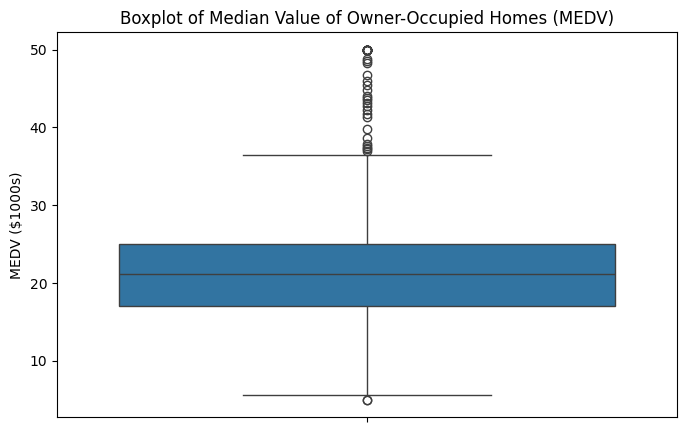

In [16]:
pyplot.figure(figsize=(8, 5))
sns.boxplot(y=boston_df["MEDV"])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("MEDV ($1000s)")
pyplot.show()



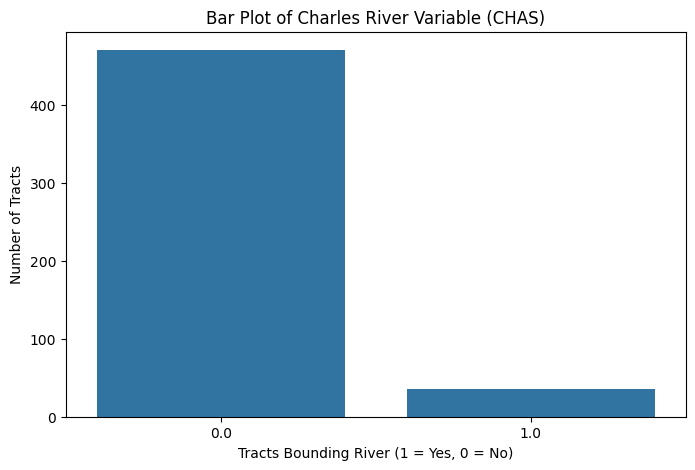

In [17]:
pyplot.figure(figsize=(8, 5))
sns.countplot(x=boston_df["CHAS"])
pyplot.title("Bar Plot of Charles River Variable (CHAS)")
pyplot.xlabel("Tracts Bounding River (1 = Yes, 0 = No)")
pyplot.ylabel("Number of Tracts")
pyplot.show()

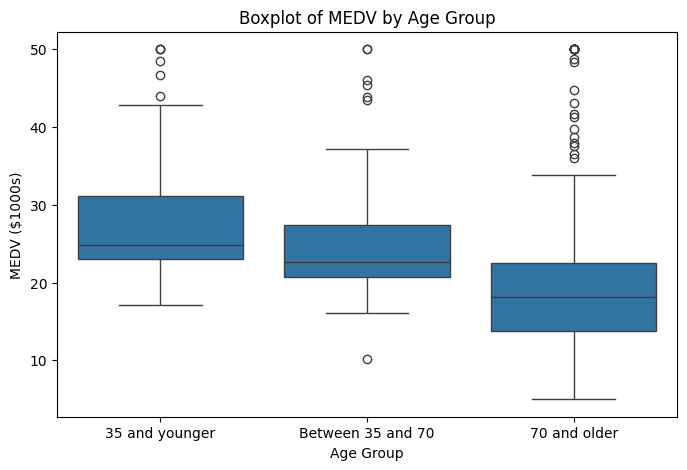

In [18]:
bins = [0, 35, 70, 100]
labels = ["35 and younger", "Between 35 and 70", "70 and older"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)

pyplot.figure(figsize=(8, 5))
sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
pyplot.title("Boxplot of MEDV by Age Group")
pyplot.xlabel("Age Group")
pyplot.ylabel("MEDV ($1000s)")
pyplot.show()

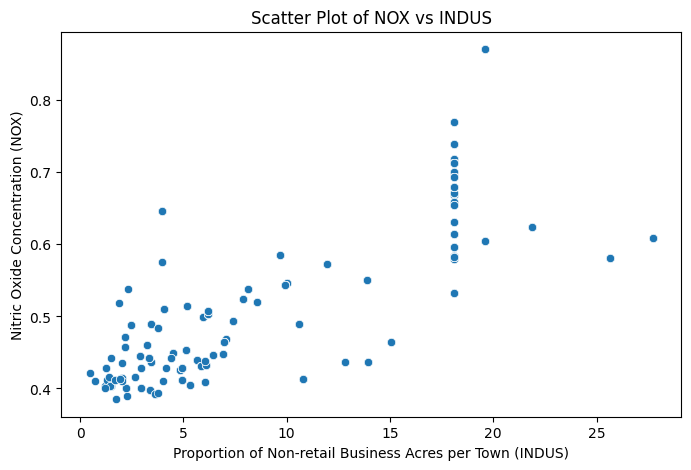

In [19]:
pyplot.figure(figsize=(8, 5))
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title("Scatter Plot of NOX vs INDUS")
pyplot.xlabel("Proportion of Non-retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.show()

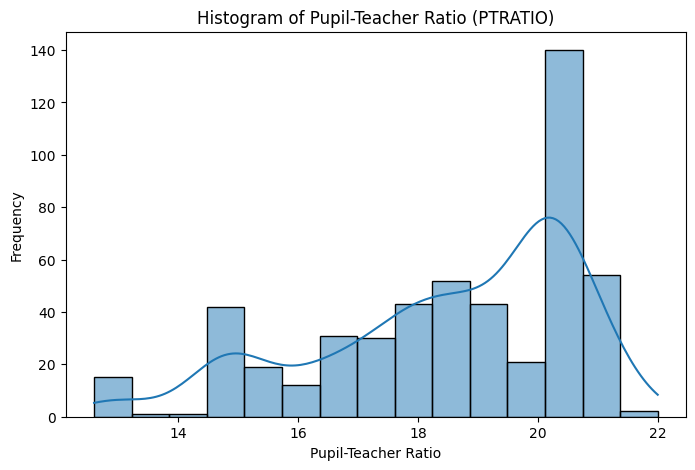

In [20]:
pyplot.figure(figsize=(8, 5))
sns.histplot(boston_df["PTRATIO"], bins=15, kde=True)
pyplot.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

In [28]:

from scipy.stats import ttest_ind
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(medv_chas1, medv_chas0)

t_stat, p_value


##If p_value < 0.05: Reject H₀ → There is a significant difference.

##If p_value >= 0.05: Fail to reject H₀ → There is no significant difference.

(3.996437466090509, 7.390623170519905e-05)

In [25]:
from scipy.stats import f_oneway


bins = [0, 35, 70, 100]
labels = ["<=35", "35-70", "70+"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)


groups = [group["MEDV"].values for name, group in boston_df.groupby("AGE_GROUP")]


f_stat, p_value = f_oneway(*groups)

f_stat, p_value

##If p_value < 0.05: Reject H₀ → There is a significant difference between groups.

##If p_value >= 0.05: Fail to reject H₀ → No significant difference.

<ipython-input-25-09aaab967173>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["MEDV"].values for name, group in boston_df.groupby("AGE_GROUP")]


(36.40764999196599, 1.7105011022702984e-15)

In [26]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])

corr, p_value
##Positive: Increase together.

##Negative: One increases, the other decreases.

(0.7636514469209192, 7.913361061210442e-98)

In [27]:
import statsmodels.api as sm

# Define X and Y
X = boston_df["DIS"]
y = boston_df["MEDV"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        16:50:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""